# Hypothesis: According to research, 71.6% of consumers admit to buying something after their normal bedtime in the past year, and 60% said they have made an online purchase between midnight and 4 a.m., according to a survey conducted for EachNight.com, which describes itself as "an educational resource that aims to provide readers with research on a variety of sleep topics to help them sleep better." We think this is true and want to prove this using Instacart data! Does time of day influence the number of snacks people put into their carts? We think, yes. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [8]:
pwd

'/Users/brittani.kauf/Desktop/DATAS-BK/Homework/Unit4'

In [9]:
#load in datasets
order_products_train = pd.read_csv('/Users/brittani.kauf/Downloads/instacart_2017_05_01/order_products__train.csv')
order_products_prior = pd.read_csv('/Users/brittani.kauf/Downloads/instacart_2017_05_01/order_products__prior.csv')
orders = pd.read_csv('/Users/brittani.kauf/Downloads/instacart_2017_05_01/orders.csv')
products = pd.read_csv('/Users/brittani.kauf/Downloads/instacart_2017_05_01/products.csv')
aisles = pd.read_csv('/Users/brittani.kauf/Downloads/instacart_2017_05_01/aisles.csv')
departments = pd.read_csv('/Users/brittani.kauf/Downloads/instacart_2017_05_01/departments.csv')

In [10]:
#exploratory data analysis #what do the dataframes look like?
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
print(order_products_prior.shape)
order_products_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [16]:
#merging department and products dataframes
departments_products = pd.merge(departments, products, on='department_id', how='left')
departments_products.head()

,department_id,department,product_id,product_name,aisle_id
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38
1,1,frozen,8,Cut Russet Potatoes Steam N' Mash,116
2,1,frozen,12,Chocolate Fudge Layer Cake,119
3,1,frozen,18,Pizza for One Suprema Frozen Pizza,79
4,1,frozen,30,"Three Cheese Ziti, Marinara with Meatballs",38


In [17]:
#combining past orders and last orders to get complete order list
order_products_total = pd.concat([order_products_train, order_products_prior], axis=0)
order_products_total.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [18]:
orders_orders = pd.merge(order_products_total, orders, on='order_id', how='left')
orders_orders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [19]:
#combining order data with department data to get final dataset
orders_prod_departments_all = pd.merge(departments_products, orders_orders, on='product_id', how='left')
orders_prod_departments_all.head()

,department_id,department,product_id,product_name,aisle_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,317499.0,13.0,0.0,8382.0,train,4.0,2.0,19.0,4.0
1,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,459014.0,6.0,1.0,102491.0,train,4.0,1.0,16.0,14.0
2,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,508627.0,13.0,0.0,145313.0,train,5.0,1.0,17.0,30.0
3,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,732095.0,8.0,1.0,167145.0,train,36.0,0.0,16.0,28.0
4,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,770868.0,6.0,1.0,92944.0,train,7.0,0.0,15.0,19.0


In [20]:
#exploring final dataset
orders_prod_departments_all.shape

(33819109, 14)

In [21]:
#removing missing data/null values
orders_prod_departments_all.isnull().sum()

department_id                   0
department                      0
product_id                      0
product_name                    0
aisle_id                        0
order_id                        3
add_to_cart_order               3
reordered                       3
user_id                         3
eval_set                        3
order_number                    3
order_dow                       3
order_hour_of_day               3
days_since_prior_order    2078071
dtype: int64

In [22]:
orders_prod_departments_clean = orders_prod_departments_all.dropna(axis=0)
orders_prod_departments_clean.isnull().sum()

department_id             0
department                0
product_id                0
product_name              0
aisle_id                  0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [23]:
#identifying correlations
corr = orders_prod_departments_clean.corr()

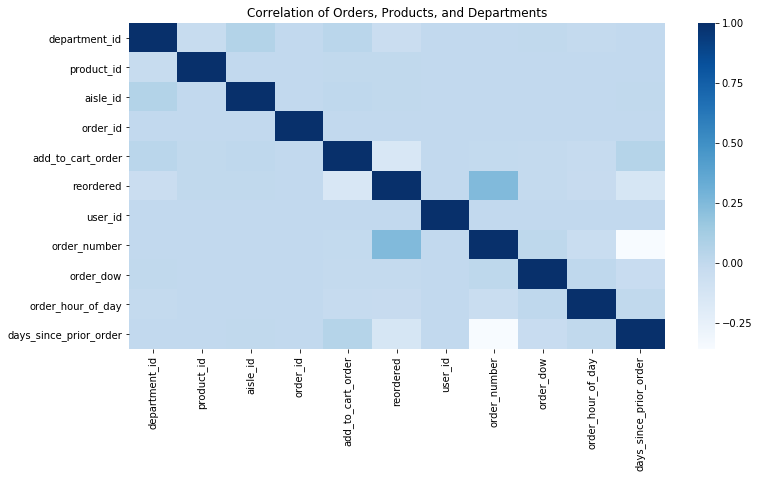

In [25]:
#correlation heatmap 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap="Blues")
plt.title("Correlation of Orders, Products, and Departments")
plt.show()

Our findings here indicate minimal correlation between these values, which makes sense, considering these are classifications.

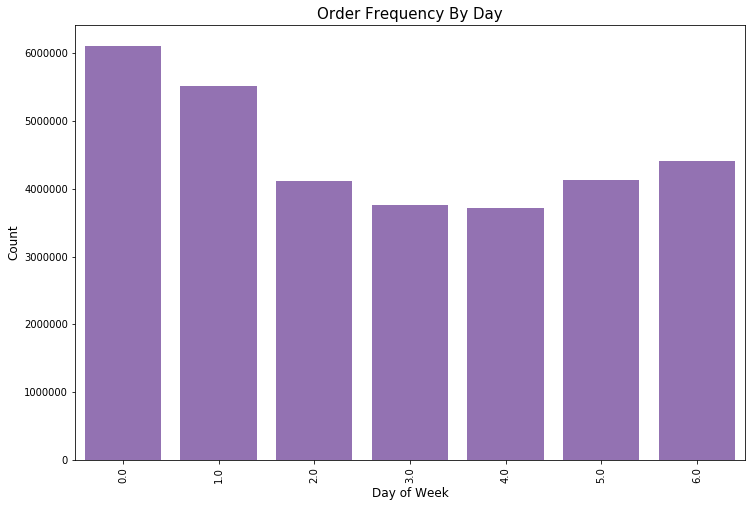

In [26]:
#graphing count of orders by days of the week 

import seaborn as sns
%matplotlib inline
color = sns.color_palette()

plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_prod_departments_clean, color=color[4])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Order Frequency By Day", fontsize=15)
plt.show()

Our findings indicate weekends are the most popular days for online ordering. 0 and 1 translate to Saturday and Sunday. Next, we wanted to visualize which hours were the most popular. 

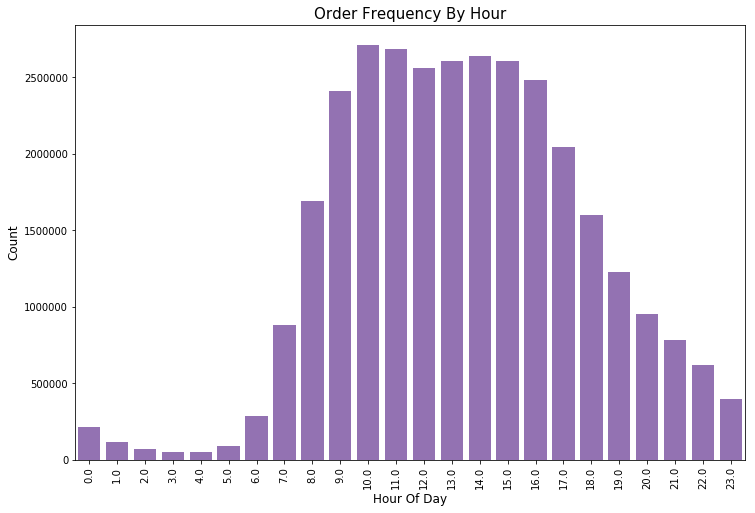

In [27]:
#graphing count of orders by hours of the day

plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_prod_departments_clean, color=color[4])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour Of Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Order Frequency By Hour", fontsize=15)
plt.show()

Our findings indicate work hours are the most popular times for online ordering, specifically 8am to 5pm. Next, we wanted to see how the days of the week compare to the hours of the day, using our correlation and heatmap.

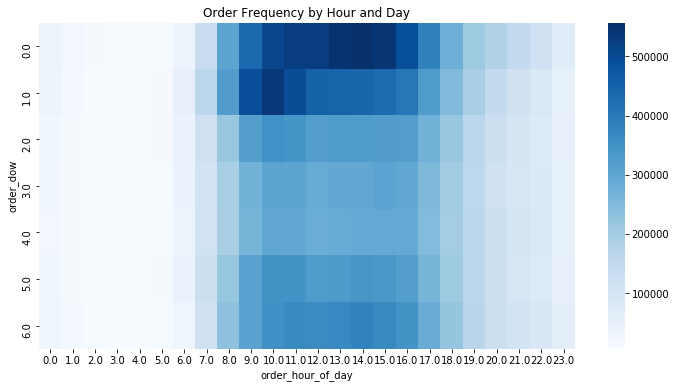

In [28]:
# heatmap 
hours_days = orders_prod_departments_clean.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
hours_days = hours_days.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(hours_days, cmap="Blues")
plt.title("Order Frequency by Hour and Day")
plt.show()

Our findings indicate that Saturday, early afternoon, and Sunday, late morning are the MOST popular times of the week hours for online ordering. Next, we will predict the frequency of...

# Linear Regression Model

In [29]:
orders_prod_departments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31741038 entries, 0 to 33819108
Data columns (total 14 columns):
department_id             int64
department                object
product_id                int64
product_name              object
aisle_id                  int64
order_id                  float64
add_to_cart_order         float64
reordered                 float64
user_id                   float64
eval_set                  object
order_number              float64
order_dow                 float64
order_hour_of_day         float64
days_since_prior_order    float64
dtypes: float64(8), int64(3), object(3)
memory usage: 3.5+ GB


In [30]:
# identifying correlations with add_to_cart variable 
np.abs(orders_prod_departments_clean.corr()['add_to_cart_order']).sort_values(ascending=False)[1:6]

reordered                 0.145415
days_since_prior_order    0.053056
department_id             0.029214
order_hour_of_day         0.014603
aisle_id                  0.009629
Name: add_to_cart_order, dtype: float64

In [31]:
# define variables, based on above correlation 
X = orders_prod_departments_clean[['reordered', 'days_since_prior_order', 'department_id', 'order_hour_of_day']]
y = orders_prod_departments_clean['add_to_cart_order']

In [32]:
# import linear regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [33]:
# fit
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# making predictions
y_predict = lreg.predict(X)

In [35]:
# predicted values for target variable 
y_predict

array([9.07627609, 7.3651436 , 9.84717458, ..., 9.92051221, 9.80462785,
       7.87020917])

In [36]:
# score 
lreg.score(X, y)

0.023126252157548936

In trying to find out what items are added to carts, we came across an insignificant correlation between "add_to_cart_order" and other variables. 

In [ ]:
# plot the results 
plt.scatter(y, y_predict)
plt.xlabel("Variables")
plt.ylabel("Add_to_Cart")
plt.title("Add to Cart Correlation")

In [ ]:
#train, test 

# K-folds

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
# we'll use a loop to go through these
cv_scores = []
num_folds = [5, 10, 25]

for fold in num_folds:
    scores = cross_val_score(estimator=lreg, X=train_std, y=y, cv=fold)
    cv_scores.append(scores)

# Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# initialize everything
ohe   = OneHotEncoder()
sc    = StandardScaler()
ridge = Ridge(alpha=100)
pipe  = make_pipeline(ohe, sc, ridge)

# and then fit it on the training set
pipe.fit(train, y)

# pickle

# final thoughts